In [28]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def process_data(train, test, lags):
    """Process data
    Reshape and split train\test data.

    # Arguments
        train: String, name of .csv train file.
        test: String, name of .csv test file.
        lags: integer, time lag.
    # Returns
        X_train: ndarray.
        y_train: ndarray.
        X_test: ndarray.
        y_test: ndarray.
        scaler: StandardScaler.
    """
    attr = 'Lane 1 Flow (Veh/5 Minutes)'
    df1 = pd.read_csv(train, encoding='utf-8').fillna(0)
    df2 = pd.read_csv(test, encoding='utf-8').fillna(0)

    # scaler = StandardScaler().fit(df1[attr].values)
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(df1[attr].values.reshape(-1, 1))
    flow1 = scaler.transform(df1[attr].values.reshape(-1, 1)).reshape(1, -1)[0]
    flow2 = scaler.transform(df2[attr].values.reshape(-1, 1)).reshape(1, -1)[0]

    time1 = [ int(t.split(' ')[1].split(':')[0]) for t in df1['5 Minutes']]
    time2 = [ int(t.split(' ')[1].split(':')[0]) for t in df2['5 Minutes']]

    train, test = [], []
    for i in range(lags, len(flow1)):
        row = np.append(flow1[i - lags: i + 1], time1[i:i+1])
        train.append(row)
    for i in range(lags, len(flow2)):
        row = np.append(flow2[i - lags: i + 1], time2[i:i+1])
        test.append(row)

    train = np.array(train)
    test = np.array(test)
    np.random.shuffle(train)

    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:, -1]

    return X_train, y_train, X_test, y_test, scaler

In [30]:
lag = 12
file1 = 'data/train.csv'
file2 = 'data/test.csv'
X_train, y_train, X_test, y_test, scaler = process_data(file1, file2, lag)

/Users/yipinghsu/School/deep/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7764, 13) (7764,) (4308, 13) (4308,)


In [32]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
y_train_onehot = np_utils.to_categorical(encoded_Y_train)

In [33]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(24, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                704       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1560      
Total params: 6,564
Trainable params: 6,564
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
history = model.fit(X_train, y_train_onehot, nb_epoch=100, batch_size=50)

/Users/yipinghsu/School/deep/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
7764/7764 [==============================] - 1s 80us/step - loss: 2.8315 - acc: 0.1378
Epoch 2/100
7764/7764 [==============================] - 0s 26us/step - loss: 2.0665 - acc: 0.2865
Epoch 3/100
7764/7764 [==============================] - 0s 29us/step - loss: 1.8315 - acc: 0.3405
Epoch 4/100
7764/7764 [==============================] - 0s 28us/step - loss: 1.7380 - acc: 0.3670
Epoch 5/100
7764/7764 [==============================] - 0s 28us/step - loss: 1.6807 - acc: 0.3724
Epoch 6/100
7764/7764 [==============================] - 0s 31us/step - loss: 1.6399 - acc: 0.3934
Epoch 7/100
7764/7764 [==============================] - 0s 30us/step - loss: 1.6142 - acc: 0.3949
Epoch 8/100
7764/7764 [==============================] - 0s 29us/step - loss: 1.5805 - acc: 0.4077
Epoch 9/100
7764/7764 [==============================] - 0s 32us/step - loss: 1.5519 - acc: 0.4158
Epoch 10/100
7764/7764 [==============================] - 0s 37us/step - loss: 1.5426 - acc: 0.4203
Epoch 11/

7764/7764 [==============================] - 0s 30us/step - loss: 1.2771 - acc: 0.5094
Epoch 84/100
7764/7764 [==============================] - 0s 28us/step - loss: 1.2751 - acc: 0.5097
Epoch 85/100
7764/7764 [==============================] - 0s 29us/step - loss: 1.2807 - acc: 0.5160
Epoch 86/100
7764/7764 [==============================] - 0s 29us/step - loss: 1.2711 - acc: 0.5144
Epoch 87/100
7764/7764 [==============================] - 0s 28us/step - loss: 1.2668 - acc: 0.5183
Epoch 88/100
7764/7764 [==============================] - 0s 26us/step - loss: 1.2592 - acc: 0.5175
Epoch 89/100
7764/7764 [==============================] - 0s 26us/step - loss: 1.2775 - acc: 0.5066
Epoch 90/100
7764/7764 [==============================] - 0s 26us/step - loss: 1.2722 - acc: 0.5139
Epoch 91/100
7764/7764 [==============================] - 0s 28us/step - loss: 1.2650 - acc: 0.5138
Epoch 92/100
7764/7764 [==============================] - 0s 26us/step - loss: 1.2664 - acc: 0.5167
Epoch 93/100


In [36]:
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)
cnf_matrix_train = confusion_matrix(y_train, y_pred)

In [37]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cnf_matrix_test = confusion_matrix(y_test, y_pred)

In [38]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


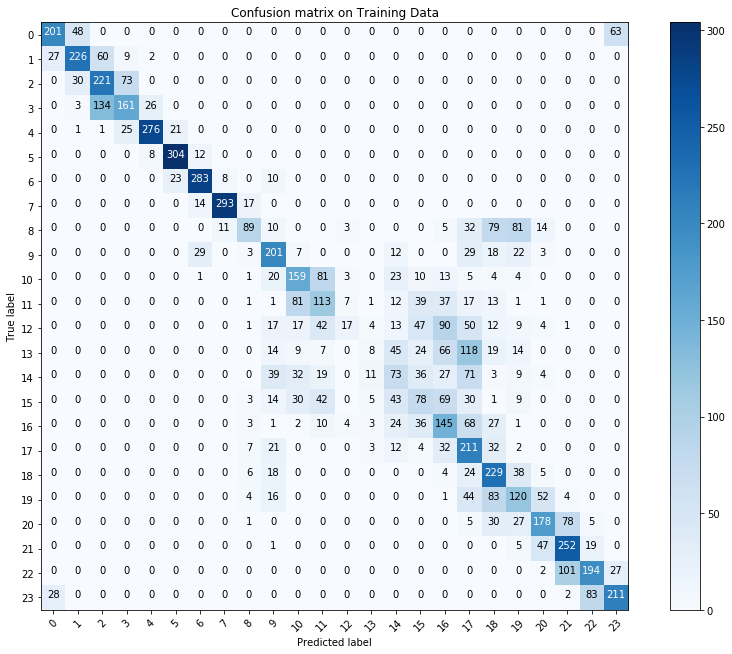

In [39]:
class_names=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.figure(figsize=(12, 9))
plot_confusion_matrix(cnf_matrix_train, classes=class_names,
                      title='Confusion matrix on Training Data')

Confusion matrix, without normalization


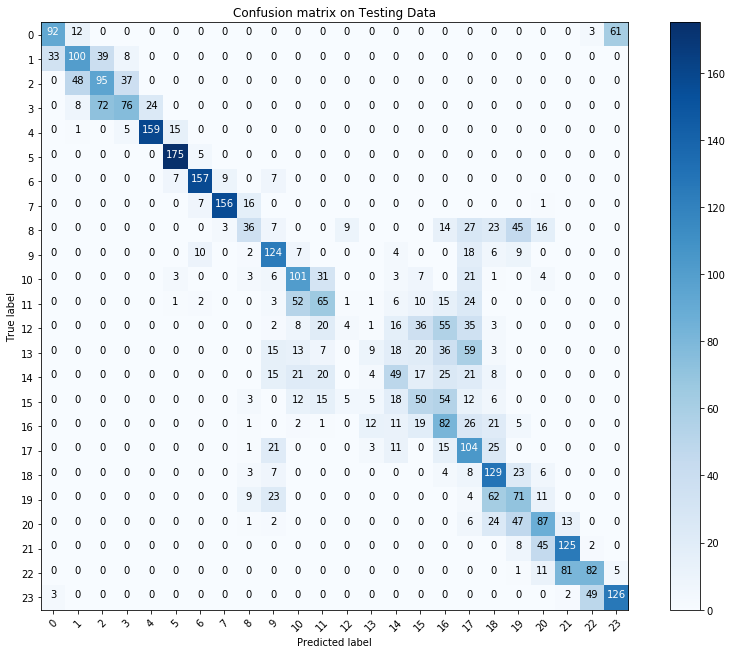

In [40]:
plt.figure(figsize=(12, 9))
plot_confusion_matrix(cnf_matrix_test, classes=class_names,
                      title='Confusion matrix on Testing Data')

In [45]:
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units=32, input_shape=(X_train.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(y_train_onehot.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [46]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 13, 32)            4352      
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 32)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 24)                792       
Total params: 13,464
Trainable params: 13,464
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
history = model.fit(x_train, y_train_onehot, nb_epoch=100, batch_size=50)

/Users/yipinghsu/School/deep/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
7764/7764 [==============================] - 5s 583us/step - loss: 2.7959 - acc: 0.1023
Epoch 2/100
7764/7764 [==============================] - 3s 377us/step - loss: 2.2079 - acc: 0.2146
Epoch 3/100
7764/7764 [==============================] - 3s 446us/step - loss: 2.0430 - acc: 0.2609
Epoch 4/100
7764/7764 [==============================] - 3s 401us/step - loss: 1.9270 - acc: 0.2922
Epoch 5/100
7764/7764 [==============================] - 3s 367us/step - loss: 1.8384 - acc: 0.3228
Epoch 6/100
7764/7764 [==============================] - 3s 359us/step - loss: 1.7573 - acc: 0.3550
Epoch 7/100
7764/7764 [==============================] - 3s 360us/step - loss: 1.6823 - acc: 0.3715
Epoch 8/100
7764/7764 [==============================] - 3s 359us/step - loss: 1.6564 - acc: 0.3816
Epoch 9/100
7764/7764 [==============================] - 3s 361us/step - loss: 1.6020 - acc: 0.4051
Epoch 10/100
7764/7764 [==============================] - 3s 356us/step - loss: 1.5628 - acc: 0.4178

7764/7764 [==============================] - 3s 365us/step - loss: 1.2203 - acc: 0.5368
Epoch 83/100
7764/7764 [==============================] - 3s 373us/step - loss: 1.2138 - acc: 0.5381
Epoch 84/100
7764/7764 [==============================] - 3s 371us/step - loss: 1.2259 - acc: 0.5264
Epoch 85/100
7764/7764 [==============================] - 3s 368us/step - loss: 1.2271 - acc: 0.5310
Epoch 86/100
7764/7764 [==============================] - 3s 371us/step - loss: 1.2150 - acc: 0.5380
Epoch 87/100
7764/7764 [==============================] - 3s 373us/step - loss: 1.2265 - acc: 0.5289
Epoch 88/100
7764/7764 [==============================] - 3s 360us/step - loss: 1.2236 - acc: 0.5285
Epoch 89/100
7764/7764 [==============================] - 3s 381us/step - loss: 1.2182 - acc: 0.5388
Epoch 90/100
7764/7764 [==============================] - 3s 428us/step - loss: 1.2233 - acc: 0.5307
Epoch 91/100
7764/7764 [==============================] - 3s 402us/step - loss: 1.2188 - acc: 0.5354
Epo

In [49]:
y_pred = model.predict(x_train)
y_pred = np.argmax(y_pred, axis=1)
cnf_matrix_train = confusion_matrix(y_train, y_pred)

Confusion matrix, without normalization


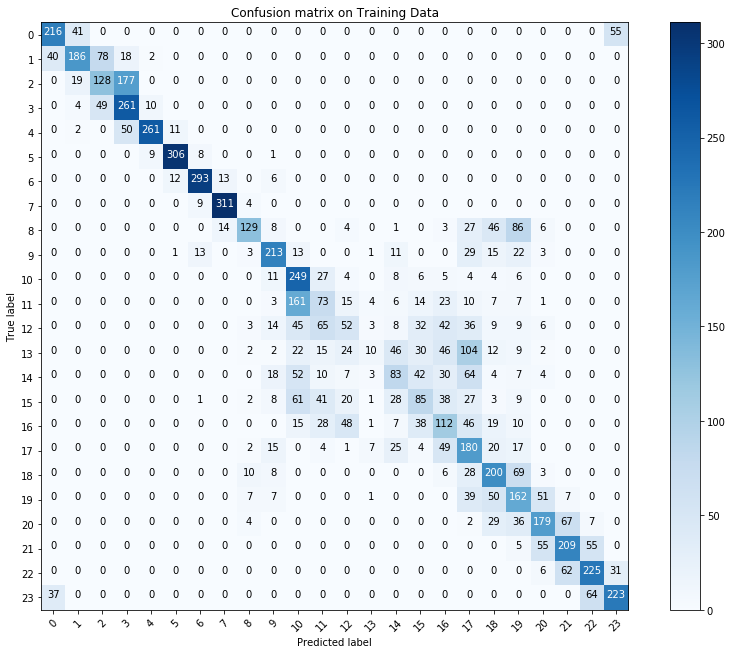

In [50]:
plt.figure(figsize=(12, 9))
plot_confusion_matrix(cnf_matrix_train, classes=class_names,
                      title='Confusion matrix on Training Data')

In [52]:
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cnf_matrix_test = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization


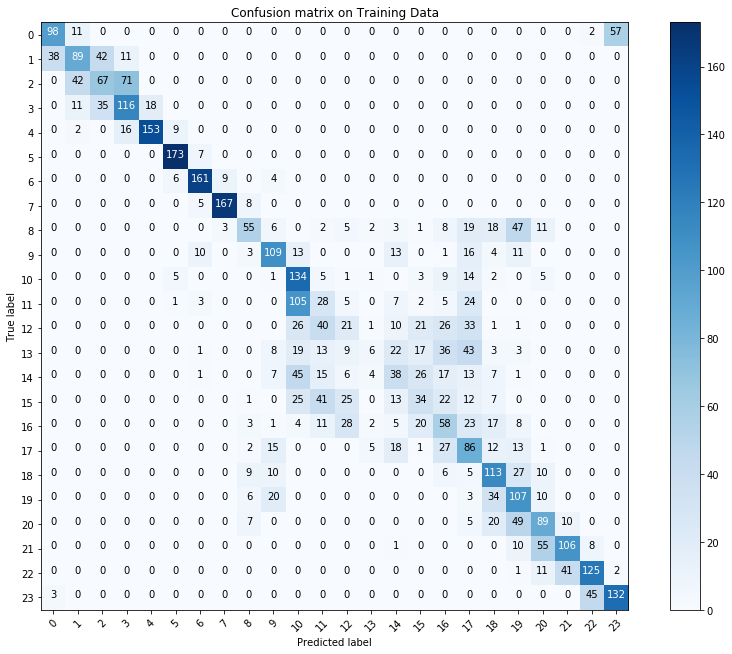

In [53]:
plt.figure(figsize=(12, 9))
plot_confusion_matrix(cnf_matrix_test, classes=class_names,
                      title='Confusion matrix on Training Data')